# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Cahya Wulaningtyas
- **Email:** cahyawulaningtyas@gmail.com
- **ID Dicoding:** cahya_wulaningtyas

## Menentukan Pertanyaan Bisnis

- Which product categories are in the top 5 highest review scores?
- What payment methods are most commonly used by customers?
- What was the trend in e-commerce gross revenue?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

In [ ]:
# Get data from dataset in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

In [ ]:
order_item_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/order_items_dataset.csv")
order_review_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/order_reviews_dataset.csv")
products_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/products_dataset.csv")
product_category_name_translation_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/product_category_name_translation.csv")

# Merge order_item_dataset & order_review_dataset
product_review_df = pd.merge(
    left = order_item_df,
    right = order_review_df,
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)

# Merge product_review_df & products_dataset
product_review_df = pd.merge(
    left = product_review_df,
    right = products_df,
    how = "inner",
    left_on = "product_id",
    right_on = "product_id"
)

# Merge product_review_df & product_category_name_translation_dataset
product_review_df = pd.merge(
    left = product_review_df,
    right = product_category_name_translation_df,
    how = "inner",
    left_on = "product_category_name",
    right_on = "product_category_name"
)[["order_id", "product_id", "product_category_name", "product_category_name_english", "review_score"]]

product_review_df.head()

,order_id,product_id,product_category_name,product_category_name_english,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,5


In [ ]:
order_payments_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
orders_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/orders_dataset.csv")
order_payments_df = pd.read_csv("/content/drive/MyDrive/IDCamp 2024 - Data Science/E-Commerce Public Dataset/order_payments_dataset.csv")

# Merge orders_df dan order_payments_df
gross_revenue_df = pd.merge(
    left = orders_df,
    right = order_payments_df,
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)[["order_purchase_timestamp", "payment_value"]]

gross_revenue_df.head()

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,18.12
1,2017-10-02 10:56:33,2.00
2,2017-10-02 10:56:33,18.59
3,2018-07-24 20:41:37,141.46
4,2018-08-08 08:38:49,179.12


**Insight:**
- To find out which product categories are in the top 5 highest review scores, it is necessary to create a new table “product_review_df” by combining 4 tables, including order_items_dataset, order_reviews_dataset, products_dataset, and product_category_name_translation.
- To get information on which payment method customers use most often, we can directly pull data from the order_payments_dataset table.
- To find out which cities need additional marketing to increase customer purchases, it is necessary to create a new table “customers_city_df” by combining 3 tables, including customers_dataset, orders_dataset, and order_payments_dataset.

### Assessing Data

**Assessing Data product_review_df**

In [ ]:
# Assessing data product_review_df
product_review_df.info()

# Checking missing value
print(" ")
print("Missing Value :")
print(product_review_df.isnull().sum())

# Checking duplicate value/row
print(" ")
print("Duplicate Value :")
product_review_duplicate_value = product_review_df.duplicated().sum()
if product_review_duplicate_value == 0:
    print("No Duplicate Value")
else:
    print("Amount of Duplicate Data : ", product_review_duplicate_value, " rows")
    print(product_review_df[product_review_df.duplicated()])

print(" ")
print("Statistical Describe :")
product_review_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       110750 non-null  object
 1   product_id                     110750 non-null  object
 2   product_category_name          110750 non-null  object
 3   product_category_name_english  110750 non-null  object
 4   review_score                   110750 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.2+ MB
 
Missing Value :
order_id                         0
product_id                       0
product_category_name            0
product_category_name_english    0
review_score                     0
dtype: int64
 
Duplicate Value :
Amount of Duplicate Data :  10369  rows
                                order_id                        product_id  \
14      0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db  

,review_score
count,110750.000000
mean,4.035395
std,1.385325
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Assessing Data order_payments_df**

In [ ]:
# Assessing data order_payments_df
order_payments_df.info()

# Checking missing value
print(" ")
print("Missing Value :")
print(order_payments_df.isnull().sum())

# Checking duplicate value/row
print(" ")
print("Duplicate Value :")
order_payment_duplicate_value = order_payments_df.duplicated().sum()
if order_payment_duplicate_value == 0:
    print("No Duplicate Value")
else:
    print("Amount of Duplicate Data : ", order_payment_duplicate_value, " rows")
    print(order_payments_df[order_payments_df.duplicated()])

print(" ")
print("Statistical Describe :")
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
 
Missing Value :
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
 
Duplicate Value :
No Duplicate Value
 
Statistical Describe :


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Assessing Data gross_revenue_df**

In [ ]:
# Assessing data gross_revenue_df
gross_revenue_df.info()

# Checking missing value
print(" ")
print("Missing Value :")
print(gross_revenue_df.isnull().sum())

# Checking duplicate value/row
print(" ")
print("Duplicate Value :")
gross_revenue_duplicate_value = gross_revenue_df.duplicated().sum()
if gross_revenue_duplicate_value == 0:
    print("No Duplicate Value")
else:
    print("Amount of Duplicate Data : ", gross_revenue_duplicate_value, " rows")
    print(gross_revenue_df[gross_revenue_df.duplicated()])

print(" ")
print("Statistical Describe :")
gross_revenue_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_purchase_timestamp  103886 non-null  object 
 1   payment_value             103886 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB
 
Missing Value :
order_purchase_timestamp    0
payment_value               0
dtype: int64
 
Duplicate Value :
Amount of Duplicate Data :  657  rows
       order_purchase_timestamp  payment_value
354         2017-11-26 12:50:56          30.22
991         2018-03-25 16:43:56          25.00
1012        2018-01-11 20:04:57          22.68
1582        2017-07-30 11:30:00          30.00
1583        2017-07-30 11:30:00          30.00
...                         ...            ...
102983      2018-04-25 10:40:29          20.00
103265      2018-04-19 08:26:03          74.94
103277      2017-02-24 20:28:53          5

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


**Insight:**
- In the product_review_df data, no missing values were found but duplicate data was found in 10,369 rows.
- There are no missing values or duplicate data in the order_payments_df data so there is no need for data cleaning.
- In gross_revenue_df data, found an incorrect data type for the order_purchase_timestamp column which should be date-time but instead is an object. Moreover, it was also found that there were duplicate values in 657 rows.
- No Inaccurate value was found in the entire data.

### Cleaning Data

**Delete Duplicate Data product_review_df**

In [ ]:
# Delete duplicate value/row in the data product_review_df
product_review_df.drop_duplicates(inplace=True)

# Rechecking duplicate value/row in the data product_review_df
print("Duplicate Value :")
product_review_duplicate_value = product_review_df.duplicated().sum()
if product_review_duplicate_value == 0:
    print("No Duplicate Value")
else:
    print("Amount of Duplicate Data : ", product_review_duplicate_value, " rows")
    print(product_review_df[product_review_df.duplicated()])

Duplicate Value :
No Duplicate Value


**Delete Duplicate Data gross_revenue_df**

In [ ]:
# Delete duplicate value/row in the data gross_revenue_df
gross_revenue_df.drop_duplicates(inplace=True)

# Rechecking duplicate value/row in the data gross_revenue_df
print("Duplicate Value :")
gross_revenue_duplicate_value = gross_revenue_df.duplicated().sum()
if gross_revenue_duplicate_value == 0:
    print("No Duplicate Value")
else:
    print("Amount of Duplicate Data : ", gross_revenue_duplicate_value, " rows")
    print(gross_revenue_df[gross_revenue_df.duplicated()])

Duplicate Value :
No Duplicate Value


**Change Incorrect Data Type in Data gross_revenue_df**

In [ ]:
datetime_columns = ["order_purchase_timestamp"]

for column in datetime_columns:
  gross_revenue_df[column] = pd.to_datetime(gross_revenue_df[column])

gross_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103229 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  103229 non-null  datetime64[ns]
 1   payment_value             103229 non-null  float64       
 2   year_month                103229 non-null  period[M]     
 3   year                      103229 non-null  int32         
 4   month                     103229 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), period[M](1)
memory usage: 3.9 MB


**Insight:**
- After cleaning data, duplicate data is not found in the product_review_df and gross_revenue_df data so that all data is ready for further analysis.
- Furthermore, no more incorrect data type was found.

## Exploratory Data Analysis (EDA)

### Explore ...

**Question 1 :**

In [ ]:
avg_category_review_score_df = product_review_df.groupby(
    by=["product_category_name", "product_category_name_english"]
).agg(
    average_of_review_score = ("review_score", "mean"),
).reset_index().sort_values(by="average_of_review_score", ascending=False)

avg_category_review_score_df.head()

,product_category_name,product_category_name_english,average_of_review_score
17,cds_dvds_musicais,cds_dvds_musicals,4.666667
37,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,4.500000
48,livros_interesse_geral,books_general_interest,4.446768
22,construcao_ferramentas_ferramentas,costruction_tools_tools,4.425532
2,alimentos_bebidas,food_drink,4.393162


**Question 2**

In [ ]:
payment_type_df = order_payments_df.groupby(
    by=["payment_type"]
).agg(
    qty_of_orders = ("payment_type", "count")
).reset_index().sort_values(by="qty_of_orders", ascending=False)

payment_type_df.head()

,payment_type,qty_of_orders
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


**Question 3**

In [ ]:
# Extract year and month
gross_revenue_df['year_month'] = gross_revenue_df['order_purchase_timestamp'].dt.to_period('M')

# Group sum payment_value by year_month
monthly_payment_value = gross_revenue_df.groupby('year_month')['payment_value'].sum()

#monthly_payment_value.head()
monthly_payment_value.tail()

,payment_value
year_month,
2018-06,1022294.36
2018-07,1065132.26
2018-08,1020997.93
2018-09,4439.54
2018-10,589.67


**Insight:**
- 5 product categories that receive the highest review scores are cds_dvds_musicals (4.67), fashion_childrens_clothes (4.5), books_general_interest (4.45), costruction_tools_tools (4.43), and food_drink (4.39).
- There are 4 payment methods commonly used by customers, which include credit_card (most commonly used), boleto, voucher, and debit_card.
- Data gross revenue_df accumulates e-commerce gross revenue based on sum of payment value per month within the period of September 2016 to October 2018.

## Visualization & Explanatory Analysis

### **Question 1:**

<ipython-input-53-d006a2af2def>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  diagram_1 = sns.barplot(
<ipython-input-53-d006a2af2def>:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  diagram_1 = sns.barplot(


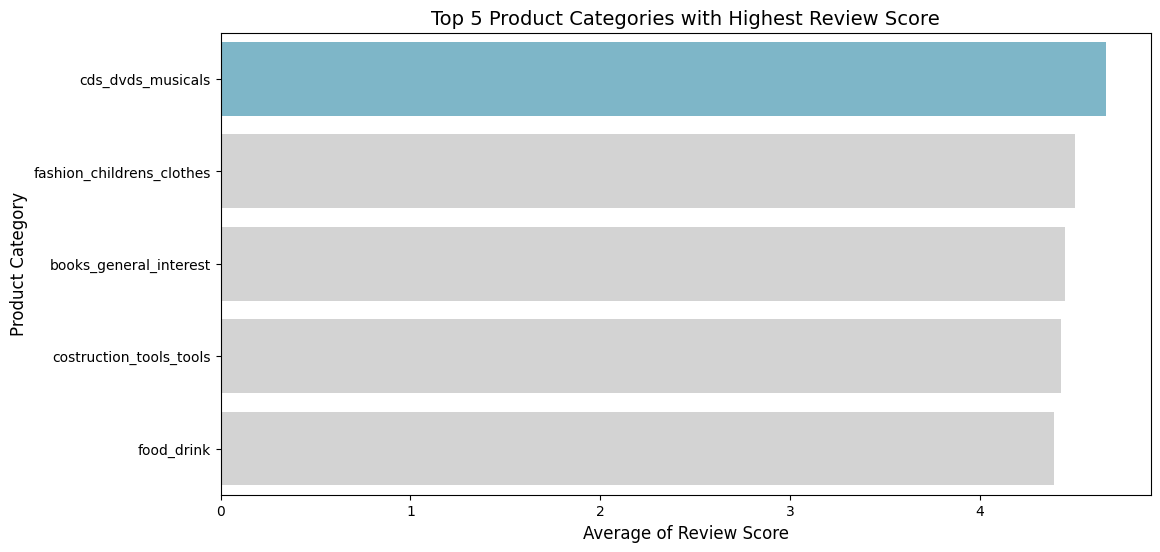

In [ ]:
# Get top 10 product categories based on the highest average review score
top5_review_score_df = avg_category_review_score_df.nlargest(5, 'average_of_review_score')

# Chart size
plt.figure(figsize=(12, 6))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Create a bar chart
diagram_1 = sns.barplot(
    data = top5_review_score_df,
    x = "average_of_review_score",
    y = "product_category_name_english",
    palette = colors_
)

# Change the labels of x-axis and y-axis
plt.xlabel("Average of Review Score", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

# Add chart title
plt.title("Top 5 Product Categories with Highest Review Score", fontsize=14)

plt.show()

### **Question 2:**

<ipython-input-17-0b0cb57f953b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  diagram_2 = sns.barplot(
<ipython-input-17-0b0cb57f953b>:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  diagram_2 = sns.barplot(


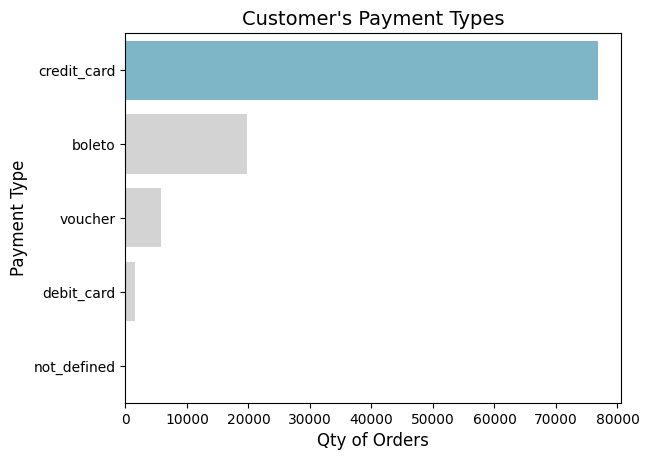

In [ ]:
# Create a bar chart
diagram_2 = sns.barplot(
    data = payment_type_df,  # Change to the correct DataFrame name
    x = "qty_of_orders",
    y = "payment_type",
    palette = colors_
)

# Change the labels of x-axis and y-axis
plt.xlabel("Qty of Orders", fontsize=12)
plt.ylabel("Payment Type", fontsize=12)

# Add chart title
plt.title("Customer's Payment Types", fontsize=14)

plt.show()

### **Question 3:**

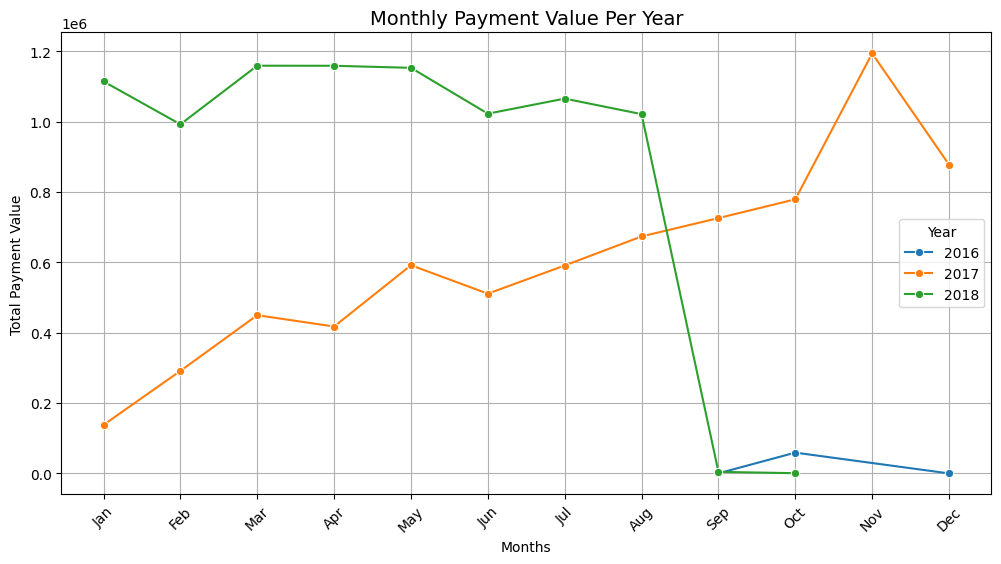

In [ ]:
# Extract year and month
gross_revenue_df['year'] = gross_revenue_df['order_purchase_timestamp'].dt.year
gross_revenue_df['month'] = gross_revenue_df['order_purchase_timestamp'].dt.month

# Group by year and month calculate the total payment_value
monthly_payment_value = gross_revenue_df.groupby(['year', 'month'])['payment_value'].sum().reset_index()

# Add month name (abbreviation) based on month number
monthly_payment_value['month_name'] = monthly_payment_value['month'].apply(lambda x: calendar.month_abbr[x])

# Sorting months (January - December)
month_order = list(calendar.month_abbr[1:])  # ['Jan', 'Feb', ..., 'Dec']
monthly_payment_value['month_name'] = pd.Categorical(monthly_payment_value['month_name'], categories=month_order, ordered=True)

# Sort by year and month
monthly_payment_value = monthly_payment_value.sort_values(['year', 'month'])

# Plot dengan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_payment_value, x='month_name', y='payment_value', hue='year', marker='o', palette="tab10")

# Format plot
plt.title("Monthly Payment Value Per Year", fontsize=14)
plt.xlabel("Months")
plt.ylabel("Total Payment Value")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(True)

plt.show()

**Insight:**
- Through bar chart type data visualization, it can be shown the product categories that are classified as Top 5 Highest Review Score and the number of each payment types used by customers.
- Through line chart type data visualization, it can be shown how the gross revenue trend of e-commerce companies based on the sum of payment value per month.

## Conclusion

**Question 1 : Which product categories are in the top 5 highest review scores?**

Product categories in the top 5 highest review scores are cds_dvds_musicals (4.67), fashion_childrens_clothes (4.5), books_general_interest (4.45), costruction_tools_tools (4.43), and food_drink (4.39).

**Question 2 : What payment methods are most commonly used by customers?**

Within 4 payment types used by customers, the most commonly used is credit card.

**Question 3 : What was the trend in e-commerce gross revenue?**

E-commerce gross revenue on September - December 2016 was stable (no significant increase or decrease) but was the lowest revenue compared to other periods. During January - December 2017, e-commerce gross revenue increased significantly and reached the highest revenue peak on November but decreased on December. During January - August 2018, e-commerce gross revenue was significant and a little bit increased than December 2017. However, on September - October 2018 period, there was a very drastic decrease which was even lower than the gross revenue of September - December 2016 period. Therefore, the e-commerce team must analyze further into what caused of gross revenue reduction and how the solution to increase e-commerce gross revenue for next periods.

In [ ]:
# Save cleaned data files
product_review_df.to_csv("product_review_dataset.csv", index=False)
order_payments_df.to_csv("order_payments_dataset.csv", index=False)
gross_revenue_df.to_csv("gross_revenue_dataset.csv", index=False)